# Import libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
import os

In [4]:
current_path = "/content/drive/MyDrive/ERA_V1/era_v1_session9_pankaja"
current_path

'/content/drive/MyDrive/ERA_V1/era_v1_session9_pankaja'

In [5]:
os.chdir(current_path)
os.getcwd()

'/content/drive/MyDrive/ERA_V1/era_v1_session9_pankaja'

In [6]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-ajl56lof
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-ajl56lof
  Resolved https://github.com/albumentations-team/albumentations.git to commit e3b47b3a127f92541cfeb16abbb44a6f8bf79cc8
  Preparing metadata (setup.py) ... done
  Created wheel for albumentations: filename=albumentations-1.3.1-py3-none-any.whl size=125700 sha256=e25d510fb8d2c555b9d5f11c76b6411e13b372a622e4977311f49be3310f822b
  Stored in directory: /tmp/pip-ephem-wheel-cache-db_71re8/wheels/f9/34/b6/eb7adf92e69b5629d7de6904c0d4ac4e5050b18ce065bab4e1
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [7]:
from __future__ import print_function
import numpy as np
from utils import plot_metrics, train, test, helper
from models import model, model_fc
import torch
import torch.nn as nn
from pprint import pprint

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

import torchvision
from torchsummary import summary
from dataloader.load_data import Cifar10DataLoader
from utils.engine import TriggerEngine


## Load config file

In [8]:
config = helper.process_config("./config/config.yaml")
use_cuda = torch.cuda.is_available()
helper.set_seed(config['model_params']['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

pprint(config)

 loading Configuration of your experiment ..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'args': {'cutout_prob': 0.5,
                                'horizontalflip_prob': 0.2,
                                'num_holes': 1,
                                'rotate_limit': 15,
                                'shiftscalerotate_prob': 0.25},
                       'type': 'albumentation'},
 'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             'frog',
                             'horse',
                             'ship',
                             'truck'],
                 'type': 'CIFAR10DataLoader'},
 'model': 'cifar10',
 'model_params': {'dr

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [10]:
model = model.Net(0.01).to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
         Dropout2d-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           2,080
             ReLU-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 32, 32, 32]           9,216
             ReLU-12           [-1, 32, 32, 32]               0
      BatchNorm2d-13           [-1, 32, 32, 32]              64
        Dropout2d-14           [-1, 32,

In [11]:
# FC layer - to be TESTED
model_2 = model_fc.Net2(0.01).to(device)
summary(model_2, input_size=(3, 32, 32))

x: torch.Size([2, 10, 1, 1])
x: torch.Size([2, 10])
x: torch.Size([2, 10])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
         Dropout2d-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           2,080
             ReLU-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 32, 32, 32]           9,216
             ReLU-12           [-1, 32, 32, 32]               0
      BatchNorm2d-13        

## Download data and view sample images

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


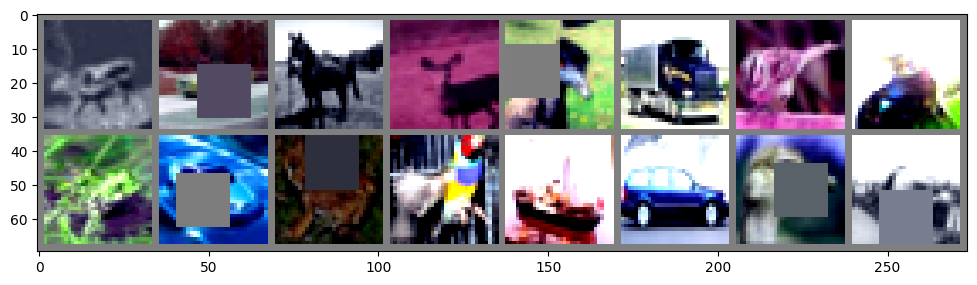

In [12]:
# functions to show an image
cifar_dataset = Cifar10DataLoader(config)
classes= config['data_loader']['classes']
fig, ax = plt.subplots(figsize=(12, 12))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


try:
  # get some random training images
  dataiter = iter(cifar_dataset.train_loader)
  images, labels = next(dataiter)

  # show images
  imshow(torchvision.utils.make_grid(images[:16]))
except Exception as ex:
  print(f"Error occurred: {ex}")


## Trigger training

**model_gap: incorporates last layer as GAP before softmax**

In [ ]:
exp_metrics={}
config['model_params']['experiment_name'] = 'CiFar_Model_GAP'
experiment_name=config['model_params']['experiment_name']

config['model_params']['model_for'] = 'gap'
config['model_params']['model_name'] = 'CiFar_Model_GAP'
trigger_training = TriggerEngine(config)

# trigger_training.
(exp_metrics[experiment_name]), model_gap = trigger_training.run_experiment()
trigger_training.save_experiment(model_gap, experiment_name)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Running experiment with 'CiFar_Model_GAP' model...
Epoch 1:


Loss=1.716870903968811 Batch_id=195 LR=0.00043 Accuracy=32.54: 100%|██████████| 196/196 [00:21<00:00,  8.92it/s]



Test set: Average loss: 0.0065, Accuracy: 4599/10000 (45.99%)

Epoch 2:


Loss=1.5444386005401611 Batch_id=195 LR=0.00053 Accuracy=44.50: 100%|██████████| 196/196 [00:21<00:00,  8.96it/s]



Test set: Average loss: 0.0057, Accuracy: 5444/10000 (54.44%)

Epoch 3:


Loss=1.559056282043457 Batch_id=195 LR=0.00069 Accuracy=51.08: 100%|██████████| 196/196 [00:22<00:00,  8.88it/s]



Test set: Average loss: 0.0051, Accuracy: 5874/10000 (58.74%)

Epoch 4:


Loss=1.3907240629196167 Batch_id=195 LR=0.00091 Accuracy=55.36: 100%|██████████| 196/196 [00:20<00:00,  9.43it/s]



Test set: Average loss: 0.0047, Accuracy: 6279/10000 (62.79%)

Epoch 5:


Loss=1.4346554279327393 Batch_id=195 LR=0.00119 Accuracy=59.22: 100%|██████████| 196/196 [00:21<00:00,  8.92it/s]



Test set: Average loss: 0.0041, Accuracy: 6705/10000 (67.05%)

Epoch 6:


Loss=1.1418933868408203 Batch_id=195 LR=0.00152 Accuracy=61.14: 100%|██████████| 196/196 [00:20<00:00,  9.55it/s]



Test set: Average loss: 0.0040, Accuracy: 6763/10000 (67.63%)

Epoch 7:


Loss=1.073167085647583 Batch_id=195 LR=0.00191 Accuracy=63.47: 100%|██████████| 196/196 [00:21<00:00,  9.11it/s]



Test set: Average loss: 0.0035, Accuracy: 7205/10000 (72.05%)

Epoch 8:


Loss=1.2346597909927368 Batch_id=195 LR=0.00233 Accuracy=65.07: 100%|██████████| 196/196 [00:20<00:00,  9.62it/s]



Test set: Average loss: 0.0035, Accuracy: 7103/10000 (71.03%)

Epoch 9:


Loss=0.8749912977218628 Batch_id=195 LR=0.00280 Accuracy=66.54: 100%|██████████| 196/196 [00:23<00:00,  8.23it/s]



Test set: Average loss: 0.0032, Accuracy: 7306/10000 (73.06%)

Epoch 10:


Loss=1.0959324836730957 Batch_id=195 LR=0.00330 Accuracy=67.11: 100%|██████████| 196/196 [00:20<00:00,  9.74it/s]



Test set: Average loss: 0.0031, Accuracy: 7434/10000 (74.34%)

Epoch 11:


Loss=0.9326202273368835 Batch_id=195 LR=0.00382 Accuracy=68.19: 100%|██████████| 196/196 [00:21<00:00,  9.05it/s]



Test set: Average loss: 0.0030, Accuracy: 7415/10000 (74.15%)

Epoch 12:


Loss=1.1226104497909546 Batch_id=195 LR=0.00437 Accuracy=69.30: 100%|██████████| 196/196 [00:19<00:00,  9.83it/s]



Test set: Average loss: 0.0030, Accuracy: 7471/10000 (74.71%)

Epoch 13:


Loss=0.7993118166923523 Batch_id=195 LR=0.00492 Accuracy=69.62: 100%|██████████| 196/196 [00:21<00:00,  9.00it/s]



Test set: Average loss: 0.0030, Accuracy: 7488/10000 (74.88%)

Epoch 14:


Loss=0.8179606199264526 Batch_id=195 LR=0.00548 Accuracy=70.30: 100%|██████████| 196/196 [00:20<00:00,  9.79it/s]



Test set: Average loss: 0.0031, Accuracy: 7382/10000 (73.82%)

Epoch 15:


Loss=0.9703499674797058 Batch_id=195 LR=0.00604 Accuracy=70.19: 100%|██████████| 196/196 [00:23<00:00,  8.30it/s]



Test set: Average loss: 0.0028, Accuracy: 7690/10000 (76.90%)

Epoch 16:


Loss=1.0964475870132446 Batch_id=195 LR=0.00658 Accuracy=70.75: 100%|██████████| 196/196 [00:20<00:00,  9.60it/s]



Test set: Average loss: 0.0029, Accuracy: 7581/10000 (75.81%)

Epoch 17:


Loss=0.8157798051834106 Batch_id=195 LR=0.00710 Accuracy=71.31: 100%|██████████| 196/196 [00:20<00:00,  9.75it/s]



Test set: Average loss: 0.0029, Accuracy: 7547/10000 (75.47%)

Epoch 18:


Loss=0.9163305163383484 Batch_id=195 LR=0.00760 Accuracy=71.20: 100%|██████████| 196/196 [00:21<00:00,  9.25it/s]



Test set: Average loss: 0.0027, Accuracy: 7714/10000 (77.14%)

Epoch 19:


Loss=0.7585396766662598 Batch_id=195 LR=0.00807 Accuracy=71.69: 100%|██████████| 196/196 [00:20<00:00,  9.57it/s]



Test set: Average loss: 0.0029, Accuracy: 7559/10000 (75.59%)

Epoch 20:


Loss=0.7426489591598511 Batch_id=195 LR=0.00850 Accuracy=71.94: 100%|██████████| 196/196 [00:21<00:00,  8.91it/s]



Test set: Average loss: 0.0028, Accuracy: 7713/10000 (77.13%)

Epoch 21:


Loss=0.7998237013816833 Batch_id=195 LR=0.00888 Accuracy=72.30: 100%|██████████| 196/196 [00:22<00:00,  8.85it/s]



Test set: Average loss: 0.0031, Accuracy: 7451/10000 (74.51%)

Epoch 22:


Loss=0.8506250381469727 Batch_id=195 LR=0.00921 Accuracy=72.22: 100%|██████████| 196/196 [00:22<00:00,  8.78it/s]



Test set: Average loss: 0.0028, Accuracy: 7659/10000 (76.59%)

Epoch 23:


Loss=0.9473646283149719 Batch_id=195 LR=0.00949 Accuracy=72.59: 100%|██████████| 196/196 [00:20<00:00,  9.67it/s]



Test set: Average loss: 0.0027, Accuracy: 7705/10000 (77.05%)

Epoch 24:


Loss=0.9910440444946289 Batch_id=195 LR=0.00971 Accuracy=72.62: 100%|██████████| 196/196 [00:22<00:00,  8.79it/s]



Test set: Average loss: 0.0031, Accuracy: 7428/10000 (74.28%)

Epoch 25:


Loss=0.857178807258606 Batch_id=195 LR=0.00987 Accuracy=72.74: 100%|██████████| 196/196 [00:20<00:00,  9.67it/s]



Test set: Average loss: 0.0026, Accuracy: 7813/10000 (78.13%)

Epoch 26:


Loss=0.6577168107032776 Batch_id=195 LR=0.00997 Accuracy=72.93: 100%|██████████| 196/196 [00:22<00:00,  8.90it/s]



Test set: Average loss: 0.0029, Accuracy: 7637/10000 (76.37%)

Epoch 27:


Loss=0.9138787388801575 Batch_id=195 LR=0.01000 Accuracy=73.25: 100%|██████████| 196/196 [00:22<00:00,  8.67it/s]



Test set: Average loss: 0.0026, Accuracy: 7787/10000 (77.87%)

Epoch 28:


Loss=0.665886402130127 Batch_id=195 LR=0.00999 Accuracy=73.36: 100%|██████████| 196/196 [00:21<00:00,  8.93it/s]



Test set: Average loss: 0.0026, Accuracy: 7775/10000 (77.75%)

Epoch 29:


Loss=0.8029195666313171 Batch_id=195 LR=0.00998 Accuracy=73.26: 100%|██████████| 196/196 [00:20<00:00,  9.33it/s]



Test set: Average loss: 0.0027, Accuracy: 7645/10000 (76.45%)

Epoch 30:


Loss=0.6009085178375244 Batch_id=195 LR=0.00994 Accuracy=73.35: 100%|██████████| 196/196 [00:21<00:00,  9.20it/s]



Test set: Average loss: 0.0026, Accuracy: 7760/10000 (77.60%)

Epoch 31:


Loss=0.6920469999313354 Batch_id=195 LR=0.00990 Accuracy=73.54: 100%|██████████| 196/196 [00:21<00:00,  9.13it/s]



Test set: Average loss: 0.0028, Accuracy: 7595/10000 (75.95%)

Epoch 32:


Loss=0.9909326434135437 Batch_id=195 LR=0.00985 Accuracy=73.55: 100%|██████████| 196/196 [00:20<00:00,  9.49it/s]



Test set: Average loss: 0.0027, Accuracy: 7737/10000 (77.37%)

Epoch 33:


Loss=0.7801176309585571 Batch_id=195 LR=0.00978 Accuracy=73.32: 100%|██████████| 196/196 [00:22<00:00,  8.66it/s]



Test set: Average loss: 0.0024, Accuracy: 7980/10000 (79.80%)

Epoch 34:


Loss=0.7588821053504944 Batch_id=195 LR=0.00970 Accuracy=74.02: 100%|██████████| 196/196 [00:20<00:00,  9.61it/s]



Test set: Average loss: 0.0025, Accuracy: 7907/10000 (79.07%)

Epoch 35:


Loss=0.8850436210632324 Batch_id=195 LR=0.00961 Accuracy=73.98: 100%|██████████| 196/196 [00:22<00:00,  8.82it/s]



Test set: Average loss: 0.0025, Accuracy: 7860/10000 (78.60%)

Epoch 36:


Loss=0.7810637950897217 Batch_id=195 LR=0.00950 Accuracy=74.08: 100%|██████████| 196/196 [00:21<00:00,  9.17it/s]



Test set: Average loss: 0.0032, Accuracy: 7487/10000 (74.87%)

Epoch 37:


Loss=0.680388867855072 Batch_id=195 LR=0.00939 Accuracy=73.91: 100%|██████████| 196/196 [00:22<00:00,  8.71it/s]



Test set: Average loss: 0.0027, Accuracy: 7719/10000 (77.19%)

Epoch 38:


Loss=0.8562558889389038 Batch_id=195 LR=0.00927 Accuracy=74.07: 100%|██████████| 196/196 [00:20<00:00,  9.33it/s]



Test set: Average loss: 0.0026, Accuracy: 7791/10000 (77.91%)

Epoch 39:


Loss=0.6515706777572632 Batch_id=195 LR=0.00913 Accuracy=74.24: 100%|██████████| 196/196 [00:23<00:00,  8.17it/s]



Test set: Average loss: 0.0029, Accuracy: 7581/10000 (75.81%)

Epoch 40:


Loss=0.8534348607063293 Batch_id=195 LR=0.00898 Accuracy=74.64: 100%|██████████| 196/196 [00:21<00:00,  9.28it/s]



Test set: Average loss: 0.0025, Accuracy: 7919/10000 (79.19%)

Epoch 41:


Loss=0.6704212427139282 Batch_id=195 LR=0.00883 Accuracy=74.57: 100%|██████████| 196/196 [00:23<00:00,  8.42it/s]



Test set: Average loss: 0.0026, Accuracy: 7746/10000 (77.46%)

Epoch 42:


Loss=0.7837486863136292 Batch_id=195 LR=0.00866 Accuracy=74.62: 100%|██████████| 196/196 [00:22<00:00,  8.86it/s]



Test set: Average loss: 0.0029, Accuracy: 7645/10000 (76.45%)

Epoch 43:


Loss=0.5934291481971741 Batch_id=195 LR=0.00849 Accuracy=74.82: 100%|██████████| 196/196 [00:21<00:00,  9.25it/s]



Test set: Average loss: 0.0024, Accuracy: 7971/10000 (79.71%)

Epoch 44:


Loss=0.6015520691871643 Batch_id=195 LR=0.00831 Accuracy=75.23: 100%|██████████| 196/196 [00:24<00:00,  7.91it/s]



Test set: Average loss: 0.0026, Accuracy: 7795/10000 (77.95%)

Epoch 45:


Loss=0.6503069400787354 Batch_id=195 LR=0.00812 Accuracy=75.46: 100%|██████████| 196/196 [00:21<00:00,  9.07it/s]



Test set: Average loss: 0.0026, Accuracy: 7806/10000 (78.06%)

Epoch 46:


Loss=0.717021107673645 Batch_id=195 LR=0.00792 Accuracy=75.01: 100%|██████████| 196/196 [00:23<00:00,  8.34it/s]



Test set: Average loss: 0.0024, Accuracy: 7986/10000 (79.86%)

Epoch 47:


Loss=0.8829142451286316 Batch_id=195 LR=0.00771 Accuracy=75.31: 100%|██████████| 196/196 [00:21<00:00,  8.98it/s]



Test set: Average loss: 0.0024, Accuracy: 7995/10000 (79.95%)

Epoch 48:


Loss=0.6236478686332703 Batch_id=195 LR=0.00750 Accuracy=75.59: 100%|██████████| 196/196 [00:21<00:00,  9.13it/s]



Test set: Average loss: 0.0022, Accuracy: 8100/10000 (81.00%)

Epoch 49:


Loss=0.6976433992385864 Batch_id=195 LR=0.00728 Accuracy=75.57: 100%|██████████| 196/196 [00:22<00:00,  8.74it/s]



Test set: Average loss: 0.0025, Accuracy: 7832/10000 (78.32%)

Epoch 50:


Loss=0.7646664381027222 Batch_id=195 LR=0.00706 Accuracy=75.97: 100%|██████████| 196/196 [00:22<00:00,  8.61it/s]



Test set: Average loss: 0.0022, Accuracy: 8092/10000 (80.92%)

Epoch 51:


Loss=0.5686088800430298 Batch_id=195 LR=0.00683 Accuracy=76.29: 100%|██████████| 196/196 [00:23<00:00,  8.51it/s]



Test set: Average loss: 0.0021, Accuracy: 8194/10000 (81.94%)

Epoch 52:


Loss=0.5979472398757935 Batch_id=195 LR=0.00659 Accuracy=76.53: 100%|██████████| 196/196 [00:20<00:00,  9.35it/s]



Test set: Average loss: 0.0022, Accuracy: 8125/10000 (81.25%)

Epoch 53:


Loss=0.5183716416358948 Batch_id=195 LR=0.00635 Accuracy=76.56: 100%|██████████| 196/196 [00:22<00:00,  8.72it/s]



Test set: Average loss: 0.0022, Accuracy: 8169/10000 (81.69%)

Epoch 54:


Loss=0.5658141374588013 Batch_id=195 LR=0.00611 Accuracy=76.50: 100%|██████████| 196/196 [00:21<00:00,  9.21it/s]



Test set: Average loss: 0.0021, Accuracy: 8228/10000 (82.28%)

Epoch 55:


Loss=0.6079956889152527 Batch_id=195 LR=0.00587 Accuracy=77.37: 100%|██████████| 196/196 [00:20<00:00,  9.44it/s]



Test set: Average loss: 0.0022, Accuracy: 8157/10000 (81.57%)

Epoch 56:


Loss=0.719079852104187 Batch_id=195 LR=0.00562 Accuracy=77.22: 100%|██████████| 196/196 [00:23<00:00,  8.32it/s]



Test set: Average loss: 0.0023, Accuracy: 8092/10000 (80.92%)

Epoch 57:


Loss=0.5447097420692444 Batch_id=195 LR=0.00537 Accuracy=77.58: 100%|██████████| 196/196 [00:21<00:00,  9.33it/s]



Test set: Average loss: 0.0021, Accuracy: 8242/10000 (82.42%)

Epoch 58:


Loss=0.8224759101867676 Batch_id=195 LR=0.00512 Accuracy=78.04: 100%|██████████| 196/196 [00:21<00:00,  8.92it/s]



Test set: Average loss: 0.0022, Accuracy: 8159/10000 (81.59%)

Epoch 59:


Loss=0.7199338674545288 Batch_id=195 LR=0.00487 Accuracy=78.26: 100%|██████████| 196/196 [00:20<00:00,  9.45it/s]



Test set: Average loss: 0.0020, Accuracy: 8285/10000 (82.85%)

Epoch 60:


Loss=0.7398805618286133 Batch_id=195 LR=0.00463 Accuracy=78.28: 100%|██████████| 196/196 [00:20<00:00,  9.38it/s]



Test set: Average loss: 0.0018, Accuracy: 8510/10000 (85.10%)

Epoch 61:


Loss=0.7326046228408813 Batch_id=195 LR=0.00438 Accuracy=78.55: 100%|██████████| 196/196 [00:24<00:00,  8.04it/s]



Test set: Average loss: 0.0019, Accuracy: 8428/10000 (84.28%)

Epoch 62:


Loss=0.7434355020523071 Batch_id=195 LR=0.00413 Accuracy=78.60: 100%|██████████| 196/196 [00:20<00:00,  9.37it/s]



Test set: Average loss: 0.0018, Accuracy: 8478/10000 (84.78%)

Epoch 63:


Loss=0.6978405714035034 Batch_id=195 LR=0.00389 Accuracy=79.35: 100%|██████████| 196/196 [00:22<00:00,  8.73it/s]



Test set: Average loss: 0.0018, Accuracy: 8482/10000 (84.82%)

Epoch 64:


Loss=0.5203859806060791 Batch_id=195 LR=0.00364 Accuracy=79.13: 100%|██████████| 196/196 [00:20<00:00,  9.54it/s]



Test set: Average loss: 0.0018, Accuracy: 8550/10000 (85.50%)

Epoch 65:


Loss=0.6694413423538208 Batch_id=195 LR=0.00341 Accuracy=79.84: 100%|██████████| 196/196 [00:22<00:00,  8.76it/s]



Test set: Average loss: 0.0019, Accuracy: 8377/10000 (83.77%)

Epoch 66:


Loss=0.7058511972427368 Batch_id=195 LR=0.00317 Accuracy=80.10: 100%|██████████| 196/196 [00:21<00:00,  9.29it/s]



Test set: Average loss: 0.0018, Accuracy: 8516/10000 (85.16%)

Epoch 67:


Loss=0.5300305485725403 Batch_id=195 LR=0.00294 Accuracy=80.34: 100%|██████████| 196/196 [00:23<00:00,  8.49it/s]



Test set: Average loss: 0.0018, Accuracy: 8500/10000 (85.00%)

Epoch 68:


Loss=0.496753066778183 Batch_id=195 LR=0.00272 Accuracy=80.61: 100%|██████████| 196/196 [00:23<00:00,  8.48it/s]



Test set: Average loss: 0.0018, Accuracy: 8534/10000 (85.34%)

Epoch 69:


Loss=0.5887153148651123 Batch_id=195 LR=0.00250 Accuracy=81.04: 100%|██████████| 196/196 [00:20<00:00,  9.34it/s]



Test set: Average loss: 0.0017, Accuracy: 8572/10000 (85.72%)

Epoch 70:


Loss=0.564430832862854 Batch_id=195 LR=0.00229 Accuracy=81.35: 100%|██████████| 196/196 [00:22<00:00,  8.70it/s]



Test set: Average loss: 0.0016, Accuracy: 8600/10000 (86.00%)

Epoch 71:


Loss=0.6395868062973022 Batch_id=195 LR=0.00208 Accuracy=81.54: 100%|██████████| 196/196 [00:21<00:00,  9.10it/s]



Test set: Average loss: 0.0016, Accuracy: 8653/10000 (86.53%)

Epoch 72:


Loss=0.2947802245616913 Batch_id=195 LR=0.00188 Accuracy=81.83: 100%|██████████| 196/196 [00:21<00:00,  9.00it/s]



Test set: Average loss: 0.0016, Accuracy: 8610/10000 (86.10%)

Epoch 73:


Loss=0.3964260220527649 Batch_id=195 LR=0.00169 Accuracy=82.20: 100%|██████████| 196/196 [00:22<00:00,  8.57it/s]



Test set: Average loss: 0.0015, Accuracy: 8711/10000 (87.11%)

Epoch 74:


Loss=0.38381075859069824 Batch_id=195 LR=0.00151 Accuracy=82.53: 100%|██████████| 196/196 [00:20<00:00,  9.37it/s]



Test set: Average loss: 0.0015, Accuracy: 8716/10000 (87.16%)

Epoch 75:


Loss=0.49310773611068726 Batch_id=195 LR=0.00133 Accuracy=82.71: 100%|██████████| 196/196 [00:21<00:00,  8.97it/s]



Test set: Average loss: 0.0016, Accuracy: 8662/10000 (86.62%)

Epoch 76:


Loss=0.5214056372642517 Batch_id=195 LR=0.00117 Accuracy=83.11: 100%|██████████| 196/196 [00:22<00:00,  8.78it/s]



Test set: Average loss: 0.0015, Accuracy: 8717/10000 (87.17%)

Epoch 77:


Loss=0.8100261688232422 Batch_id=195 LR=0.00101 Accuracy=83.41: 100%|██████████| 196/196 [00:20<00:00,  9.39it/s]



Test set: Average loss: 0.0015, Accuracy: 8771/10000 (87.71%)

Epoch 78:


Loss=0.5576386451721191 Batch_id=195 LR=0.00087 Accuracy=83.54: 100%|██████████| 196/196 [00:25<00:00,  7.74it/s]



Test set: Average loss: 0.0014, Accuracy: 8777/10000 (87.77%)

Epoch 79:


Loss=0.6063444018363953 Batch_id=195 LR=0.00073 Accuracy=83.93: 100%|██████████| 196/196 [00:21<00:00,  9.06it/s]



Test set: Average loss: 0.0014, Accuracy: 8820/10000 (88.20%)

Epoch 80:


Loss=0.39367806911468506 Batch_id=195 LR=0.00061 Accuracy=84.07: 100%|██████████| 196/196 [00:21<00:00,  9.33it/s]



Test set: Average loss: 0.0014, Accuracy: 8835/10000 (88.35%)

Epoch 81:


Loss=0.6194416284561157 Batch_id=195 LR=0.00049 Accuracy=84.45: 100%|██████████| 196/196 [00:22<00:00,  8.71it/s]



Test set: Average loss: 0.0014, Accuracy: 8838/10000 (88.38%)

Epoch 82:


Loss=0.5454889535903931 Batch_id=195 LR=0.00039 Accuracy=84.38: 100%|██████████| 196/196 [00:21<00:00,  9.32it/s]



Test set: Average loss: 0.0014, Accuracy: 8838/10000 (88.38%)

Epoch 83:


Loss=0.6166663765907288 Batch_id=195 LR=0.00030 Accuracy=84.60: 100%|██████████| 196/196 [00:23<00:00,  8.47it/s]



Test set: Average loss: 0.0014, Accuracy: 8853/10000 (88.53%)

Epoch 84:


Loss=0.3666238486766815 Batch_id=195 LR=0.00022 Accuracy=84.76: 100%|██████████| 196/196 [00:22<00:00,  8.59it/s]



Test set: Average loss: 0.0014, Accuracy: 8872/10000 (88.72%)

Epoch 85:


Loss=0.3782210052013397 Batch_id=131 LR=0.00018 Accuracy=85.32:  67%|██████▋   | 131/196 [00:15<00:08,  7.55it/s] 

**model_fc: incorporates fully connected last layer**

In [ ]:
exp_metrics={}
config['model_params']['experiment_name'] = 'CiFar_Model_FC'
experiment_name = config['model_params']['experiment_name']

config['model_params']['model_for'] = 'fc'
config['model_params']['model_name'] = 'CiFar_Model_FC'
trigger_training = TriggerEngine(config)

# trigger_training.
(exp_metrics[experiment_name]), model_fc = trigger_training.run_experiment()
trigger_training.save_experiment(model_fc, experiment_name)


## Model summary

In [ ]:
trigger_training.model_summary(model_gap, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
         Dropout2d-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]           2,080
             ReLU-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           9,216
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
        Dropout2d-14           [-1, 32,

In [ ]:
trigger_training.model_summary(model_fc, (3,32,32))

## Missclassification

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total wrong predictions are 1257


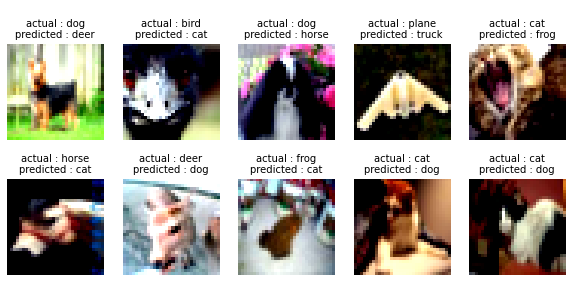

In [ ]:
model = torch.load(f'./saved_models/{experiment_name}.pt')
model.eval()
trigger_training.wrong_predictions(model)

## Plots for Validation Loss and Accuracy

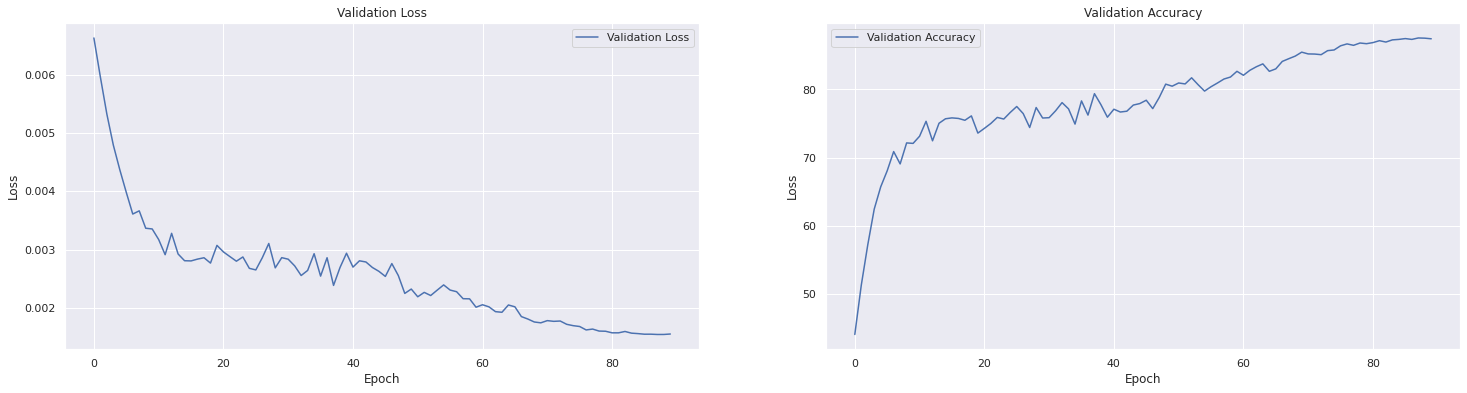

In [ ]:
plot_metrics.plot_metrics(exp_metrics[experiment_name])

## Accuracy for each class

In [ ]:
helper.class_level_accuracy(model, cifar_dataset.test_loader, device, classes)

Accuracy of plane : 89 %
Accuracy of   car : 95 %
Accuracy of  bird : 81 %
Accuracy of   cat : 70 %
Accuracy of  deer : 86 %
Accuracy of   dog : 79 %
Accuracy of  frog : 92 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 94 %
